# Clean and Analyze Employee Exit Surveys
## Introduction
- In this project, we'll clean and analyze exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://www.qld.gov.au/education) and the [Technical and Further Education (TAFE)](https://tafeqld.edu.au/) of Queensland in Australia.
- Our goal is to identify the dissatisfaction of the employees that exit, the ones who worked for a short period and the ones that stayed longer. 
- Identifying this situation is very important for a workspace, [low job satisfaction can cause a lot of problems in the workspace](https://smallbusiness.chron.com/effects-low-job-satisfaction-10721.html), like employees with low productivity, more turnover cases and can affect customer experience. Besides that, with the exit of these employees, the replacement is more costful than maintaining them.
- This project is directed to department heads and human resources.

## Introducing the Data
- We'll use the datasets published in the australian government site of data. We can find the DETE dataset [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the TAFE dataset [here](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId=%22ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e%22). 

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import seaborn as sns

In [2]:
# importing the datasets
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

In [3]:
# Knowing the dataset
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

## Cleaning the data
- Analysing the both datasets, we notice several differences about the column names, with the TAFE dataset including the questions of the survey and having 72 columns. The DETE dataset has 56 columns, with more short names;
- Both datasets have a lot of missing data, expressed in different ways: "Not Stated", "N", "NaN", or just "-";
- Both the DETE and TAFE datasets contains many columns that we don't need to complete our analysis.

### 1. Identifying missing values and dropping unnecessary columns

In [7]:
# Use the pd.read_csv() function to specify values that should be represented as NaN:
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
# Dropping columns we don't need
dete_updated = dete.drop(dete.columns[28:49], axis=1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

In [9]:
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [10]:
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

### 2. Cleaning column names

In [11]:
#Updating column names
dete_updated.columns = dete_updated.columns.str.lower().str.replace(' ','_').str.strip()

tafe_map = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_updated.rename(tafe_map, axis = 1, inplace = True)
print(dete_updated.info())
print(tafe_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

- Each dataframe contains many of the same columns, but the column names are different. 
- Because we eventually want to combine them, we had to standardize the column names. 

### 3. Filtering the data
- We want the informations about the employees that resignate, so, we are going to filter both datasets.

In [12]:
# Checking the unique values
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# Selecting resignations
dete_resignations = dete_updated[dete_updated['separationtype'].str.contains('Resignation-')].copy()
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [14]:
# Checking the unique values
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
# Selecting resignations
tafe_resignations = tafe_updated[tafe_updated['separationtype'].str.contains('Resignation', na=False)].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

### 4. Verifying the data
- Now, we'll verify the date columns

In [16]:
# Checking unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
# Extracting the year
year_pattern = r"([2][0][0-9][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern).astype('float')
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
# Checking unique values
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
# Checking unique values of dete_start_date
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [20]:
# Checking unique values 
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

### 5. Creating a new column
- In order to know how long the employee worked, we need to create a new column in dete dataset: 'institute_service'. The tafe dataset already have a column with this information, also called 'institute_service'.

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64

### 6. Identifying disatisfied employees
- Now, we'll work on the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe dataset.

In [22]:
# Checking unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
# Checking unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_val(val):
    """Update the value to boolean or np.nan.

    Args:
      val: The value to be updated.

    Returns:
      bool or np.nan.
    """
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_val)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_val)

In [25]:
# Checking unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
# Checking unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
# Unifying the columns
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [28]:
# Unifying the column
job_dissatisfaction = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[job_dissatisfaction].any(axis = 1, skipna = False)
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [29]:
# Updating the changes
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

- We identifyed any employees who resigned because they were dissatisfied;
- If the employee indicated any of the factors above caused them to resign, we marked them as dissatisfied in a new column in both datasets.

### 7. Combining the data
- On this topic, we'll combine the two datasets.

In [30]:
# Creating a 'institution' column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [31]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [32]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [33]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


- At this point, we merged the data and drop columns that had less than 500 non null values.

### 8. Cleaning the service column
- With our main goal in mind (identify the main reasons of dissatisfaction of the employees that exit, the ones who worked for a short period and the ones that stayed longer), next, we'll clean the institute_service column and categorize employees according to the following definitions (We used [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) to base our classification):
  - New: Less than 3 years in the workplace;
  - Experienced: 3-6 years in the workplace;
  - Established: 7-10 years in the workplace;
  - Veteran: 11 or more years in the workplace.

In [34]:
# Checking the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [35]:
# Extracting the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Checking the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [36]:
#convert years of services in categories
def transform_service(val):
    """Convert years of service to categories.

    Args:
      val: The value to be converted.

    Returns:
      object.
    """
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Checking the unique values
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### 9. Checking other columns
- In this topic, we'll check other columns that can be useful for our analysis: 'age', 'gender' and 'employment_status'.

In [37]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [38]:
# Cleaning the values
age_map = {
    '51-55':'51-55',
    '41-45':'41-45',
    '41  45':'41-45',
    '46-50':'46-50',
    '36-40':'36-40',
    '46  50':'46-50',
    '26-30':'26-30',
    '21  25':'21-25',
    '36  40':'36-40',
    '31  35':'31-35',
    '26  30':'26-30',
    '21-25':'21-25',
    '56 or older':'56+',
    '31-35':'31-35',
    '56-60':'56+',
    '61 or older':'56+',
    '20 or younger':'20-'
    }
combined_updated['age'] = combined_updated['age'].map(age_map)

In [39]:
# Checking the unique values
combined_updated['age'].value_counts(dropna=False)

41-45    93
46-50    81
56+      78
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
NaN      55
20-      10
Name: age, dtype: int64

In [40]:
# Checking gender values
combined_updated['gender'].value_counts(dropna=False)

Female    424
Male      168
NaN        59
Name: gender, dtype: int64

In [41]:
# Checking employment_status values
combined_updated['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [42]:
es_map = {
    'Permanent Full-time':'Perm. FT',
    'Permanent Part-time':'Perm. PT',
    'Temporary Full-time':'Temp. FT',
    'Temporary Part-time':'Temp. PT',
    'Contract/casual':'Cont./Cas.',
    'Casual':'Cont./Cas.'
    }
combined_updated['employment_status'] = combined_updated['employment_status'].map(es_map)

In [43]:
combined_updated['employment_status'].value_counts(dropna=False)

Perm. FT      256
Perm. PT      150
Temp. FT      120
NaN            54
Temp. PT       37
Cont./Cas.     34
Name: employment_status, dtype: int64

### 10. Dealing with missing values
- Last section, we identified some columns that can be useful for our analysis that have some missing values. The missing values represent less than 10% of the total for these columns, so we'll fill with the most commom value of each.

In [44]:
# Replace missing values with the most frequent value, '41-45'
combined_updated['age'] = combined_updated['age'].fillna('41-45')

In [45]:
# Checking new values
combined_updated['age'].value_counts()

41-45    148
46-50     81
56+       78
36-40     73
51-55     71
26-30     67
21-25     62
31-35     61
20-       10
Name: age, dtype: int64

In [46]:
# Replace missing values with the most frequent value, 'Female'
combined_updated['gender'] = combined_updated['gender'].fillna('Female')

In [47]:
# Checking new values
combined_updated['gender'].value_counts()

Female    483
Male      168
Name: gender, dtype: int64

In [48]:
# Replace missing values with the most frequent value, 'Permanent Full-time'
combined_updated['employment_status'] = combined_updated['employment_status'].fillna('Perm. FT')

In [49]:
# Checking new values
combined_updated['employment_status'].value_counts()

Perm. FT      310
Perm. PT      150
Temp. FT      120
Temp. PT       37
Cont./Cas.     34
Name: employment_status, dtype: int64

## Exploratory Data Analysis (EDA)
- After the data cleaning, we're ready for our analysis. As our goal is to identify the main reasons of dissatisfaction of the employees that exit (the ones who worked for a short period and the ones that stayed longer), we're going to base our exploration on the 'dissatisfaction' column and the 'service_cat' categories.  
- First, we'll compare dissatisfaction between the 'service_cat' categories. After, we'll analyse each category with other columns: 'age', 'gender', and 'employment_status', so we can  characterize more the dissatisfaction.
- Remembering that we are classifying the time of service in four categories:
  - New: Less than 3 years in the workplace;
  - Experienced: 3-6 years in the workplace;
  - Established: 7-10 years in the workplace;
  - Veteran: 11 or more years in the workplace.
- Understanding the [differences of engagement and dissatisfaction in each category](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) is a key factor to find solutions to this problem.

<AxesSubplot:xlabel='service_cat'>

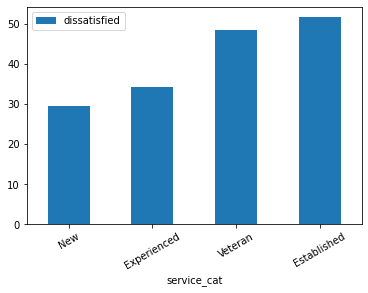

In [50]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dis_sc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_sc.sort_values('dissatisfied', ascending=True, inplace=True)
dis_sc = dis_sc['dissatisfied'] * 100

# Plot the results
dis_sc.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='age'>

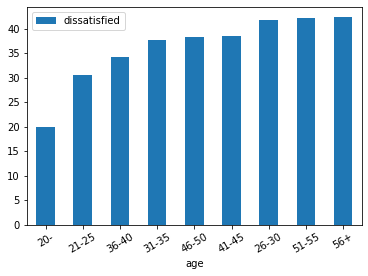

In [51]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dis_age = combined_updated.pivot_table(index='age', values='dissatisfied')
dis_age.sort_values('dissatisfied', ascending=True, inplace=True)
dis_age = dis_age['dissatisfied'] * 100

# Plot the results
dis_age.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='gender'>

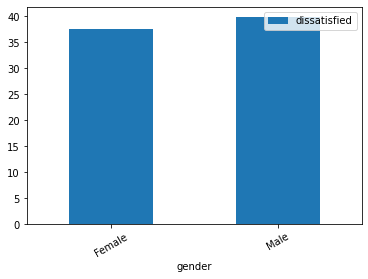

In [52]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dis_gen = combined_updated.pivot_table(index='gender', values='dissatisfied')
dis_gen.sort_values('dissatisfied', ascending=True, inplace=True)
dis_gen = dis_gen['dissatisfied'] * 100

# Plot the results
dis_gen.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='employment_status'>

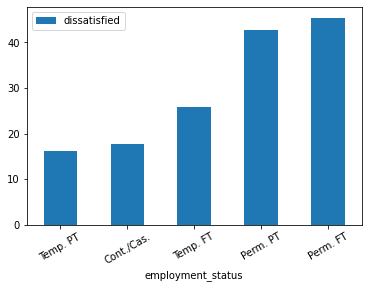

In [53]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dis_es = combined_updated.pivot_table(index='employment_status', values='dissatisfied')
dis_es.sort_values('dissatisfied', ascending=True, inplace=True)
dis_es = dis_es['dissatisfied'] * 100

# Plot the results
dis_es.plot(kind='bar', rot=30, legend='dissatisfied')

- Observing the general part of our analysis, we can highlight some categories with more dissatisfaction on our set: Establisheds and Veterans; Age rate: 56+, 51-55, 26-30; Gender: Male(with a little difference for Female); Employment Status: Permanent Full-time, followed by Permanent Part-time. 

### 1. New
- On this topic, we'll analyze the same columns as above, but for employees with less than 3 years in the workplace.

In [54]:
# Slicing the category
new = combined_updated[combined_updated['service_cat'] == 'New']

<AxesSubplot:xlabel='age'>

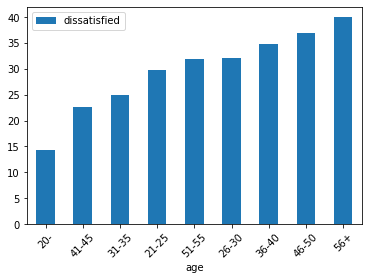

In [55]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
new_age = new.pivot_table(index='age', values='dissatisfied')
new_age.sort_values('dissatisfied', ascending=True, inplace=True)
new_age = new_age['dissatisfied'] * 100

# Plot the results
new_age.plot(kind='bar', rot=45, legend='dissatisfied')

<AxesSubplot:xlabel='gender'>

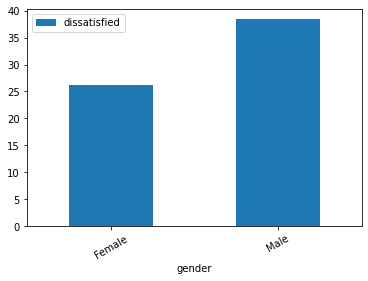

In [56]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each gender
new_gen = new.pivot_table(index='gender', values='dissatisfied')
new_gen.sort_values('dissatisfied', ascending=True, inplace=True)
new_gen = new_gen['dissatisfied'] * 100

# Plot the results
new_gen.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='employment_status'>

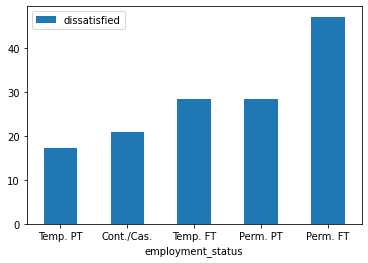

In [57]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
new_es = new.pivot_table(index='employment_status', values='dissatisfied')
new_es.sort_values('dissatisfied', ascending=True, inplace=True)
new_es = new_es['dissatisfied'] * 100

# Plot the results
new_es.plot(kind='bar', rot='horizontal', legend='dissatisfied')

- Analyzing only the employees that worked lass than three years, we can see some aspects in dissatisfaction: Age: 56+, followed by 46-50 and 36-40; Gender: Male, just like the general, but with more distance to Female); Employment Status: Permanent Full-Time, with a bigger diference from Permanent Part-Time.

### 2. Experienced
- On this topic, we'll analyze the same columns as above, but for employees with three to six years in the workplace.

In [58]:
# Slicing the category
experienced = combined_updated[combined_updated['service_cat'] == 'Experienced']

<AxesSubplot:xlabel='age'>

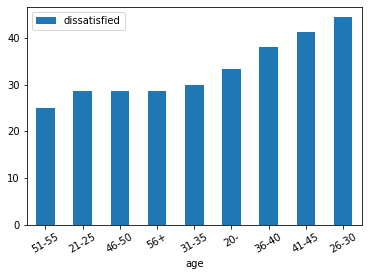

In [59]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
exp_age = experienced.pivot_table(index='age', values='dissatisfied')
exp_age.sort_values('dissatisfied', ascending=True, inplace=True)
exp_age = exp_age['dissatisfied'] * 100

# Plot the results
exp_age.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='gender'>

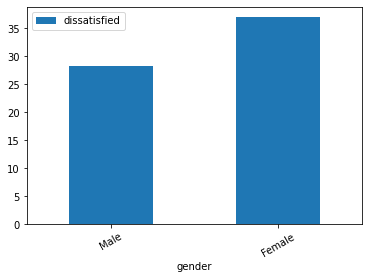

In [60]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
exp_gen = experienced.pivot_table(index='gender', values='dissatisfied')
exp_gen.sort_values('dissatisfied', ascending=True, inplace=True)
exp_gen = exp_gen['dissatisfied'] * 100

# Plot the results
exp_gen.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='employment_status'>

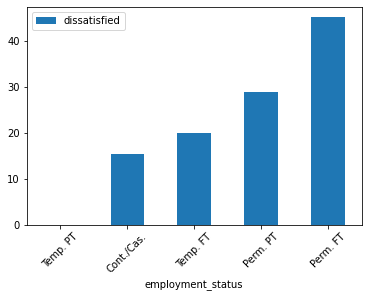

In [61]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
exp_es = experienced.pivot_table(index='employment_status', values='dissatisfied')
exp_es.sort_values('dissatisfied', ascending=True, inplace=True)
exp_es = exp_es['dissatisfied'] * 100

# Plot the results
exp_es.plot(kind='bar', rot=45, legend='dissatisfied')

- Analyzing only the employees that worked from three to six years, we noticed some differences from the general plots in dissatisfaction: Age: 26-30 followed by 41-45; Gender: Female; Employment Status: Permanent Full-Time.

### 3. Established
- On this topic, we'll analyze the same columns as above, but for employees with seven to ten years in the workplace.

In [62]:
# Slicing the category
established = combined_updated[combined_updated['service_cat'] == 'Established']

<AxesSubplot:xlabel='age'>

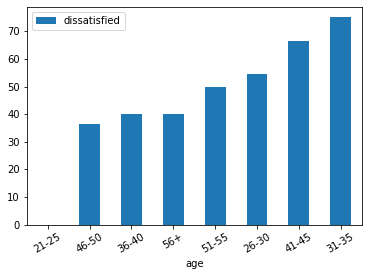

In [63]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
est_age = established.pivot_table(index='age', values='dissatisfied')
est_age.sort_values('dissatisfied', ascending=True, inplace=True)
est_age = est_age['dissatisfied'] * 100

# Plot the results
est_age.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='gender'>

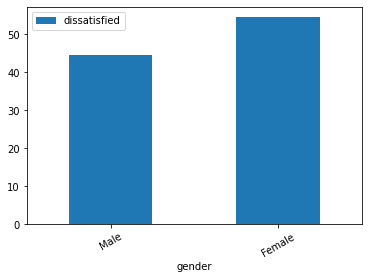

In [64]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
est_gen = established.pivot_table(index='gender', values='dissatisfied')
est_gen.sort_values('dissatisfied', ascending=True, inplace=True)
est_gen = est_gen['dissatisfied'] * 100

# Plot the results
est_gen.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='employment_status'>

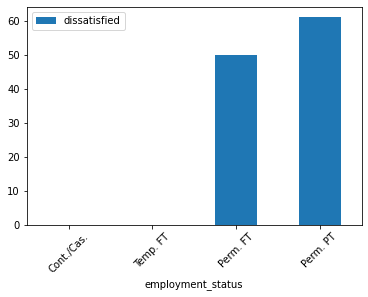

In [65]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
est_es = established.pivot_table(index='employment_status', values='dissatisfied')
est_es.sort_values('dissatisfied', ascending=True, inplace=True)
est_es = est_es['dissatisfied'] * 100

# Plot the results
est_es.plot(kind='bar', rot=45, legend='dissatisfied')

- Analyzing only the employees that worked from seven to ten years, the dissatisfaction occurs: Age:31-35 (differently of the others); Gender: Female; Employment Status: Permanent Part-Time, followed by Permanent Full-Time.

### 4. Veterans
- On this topic, we'll analyze the same columns as above, but for employees with more than eleven years of service.

In [66]:
# Slicing the category
veteran = combined_updated[combined_updated['service_cat'] == 'Veteran']

<AxesSubplot:xlabel='age'>

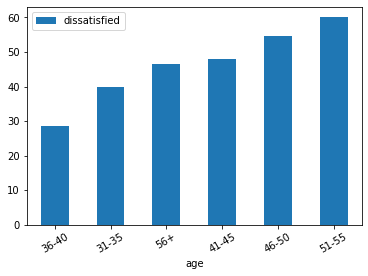

In [67]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
vet_age = veteran.pivot_table(index='age', values='dissatisfied')
vet_age.sort_values('dissatisfied', ascending=True, inplace=True)
vet_age = vet_age['dissatisfied'] * 100

# Plot the results
vet_age.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='gender'>

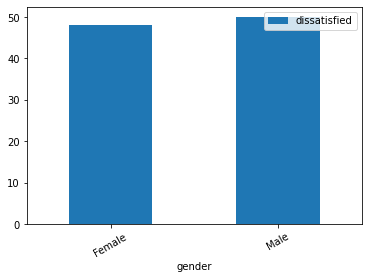

In [68]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
vet_gen = veteran.pivot_table(index='gender', values='dissatisfied')
vet_gen.sort_values('dissatisfied', ascending=True, inplace=True)
vet_gen = vet_gen['dissatisfied'] * 100

# Plot the results
vet_gen.plot(kind='bar', rot=30, legend='dissatisfied')

<AxesSubplot:xlabel='employment_status'>

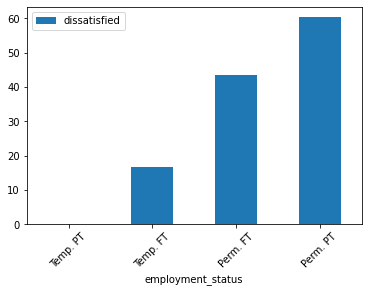

In [69]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
vet_es = veteran.pivot_table(index='employment_status', values='dissatisfied')
vet_es.sort_values('dissatisfied', ascending=True, inplace=True)
vet_es = vet_es['dissatisfied'] * 100

# Plot the results
vet_es.plot(kind='bar', rot=45, legend='dissatisfied')

- Analyzing only the employees that worked more than eleven years, we can see some aspects in dissatisfaction: Age: 51-55, followed by 46-50; Gender: Male, with a little difference to Female; Employment Status: Permanent Part-Time.

## Data Visualization
- In this section, we'll make a presentation of the results founded in the Exploratory Data Analysis. Following the same structure of our analysis, we'll start with the general view and them each category.

In [70]:
#Setting the style
style.use("seaborn-dark")

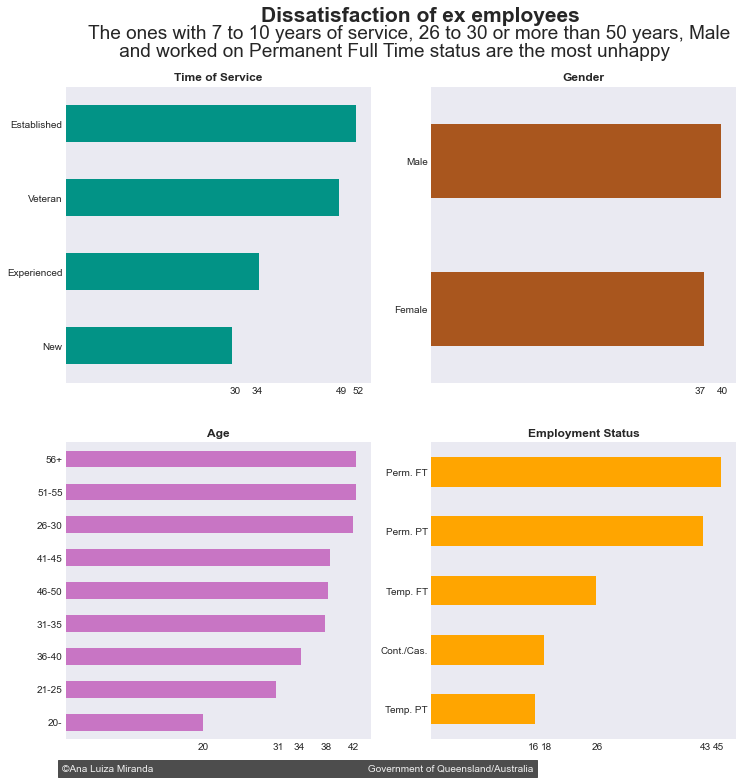

In [71]:
#Plotting a graph with the general dissatisfaction
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
                                    ncols=2,
                                    nrows=2,
                                    figsize=(12, 12))

ax1 = dis_sc.plot(kind='barh', ax=ax1, legend=None, color='#029386')
ax1.set_title('Time of Service', weight="bold")
ax1.set_ylabel('')
ax1.set_xticks([30,34,49,52])
ax1.set_xticklabels([30,34,49,52])

ax2 = dis_gen.plot(kind= 'barh', ax=ax2, legend=None, color='#A9561E')
ax2.set_title('Gender', weight="bold")
ax2.set_ylabel('')
ax2.set_xticks([37,40])
ax2.set_xticklabels([37,40])

ax3 = dis_age.plot(kind= 'barh', ax=ax3, legend=None, color='#C875C4')
ax3.set_title('Age',weight="bold")
ax3.set_ylabel('')
ax3.set_xticks([20,31,34,38,42])
ax3.set_xticklabels([20,31,34,38,42])

ax4 = dis_es.plot(kind= 'barh', ax=ax4, legend=None, color='#FFA500')
ax4.set_title('Employment Status', weight="bold") 
ax4.set_ylabel('')
ax4.set_xticks([16,18,26,43,45])
ax4.set_xticklabels([16,18,26,43,45])

#Graph title
fig.text(x=0.35,y=0.955,s="Dissatisfaction of ex employees",size=21, weight="bold")
fig.text(x=0.15,y=0.935,s="The ones with 7 to 10 years of service, 26 to 30 or more than 50 years, Male",size=19)
fig.text(x=0.18,y=0.915, s=" and worked on Permanent Full Time status are the most unhappy",size=19)

#Foot signature/source of graph:
fig.text(x=0.12, y=0.088,s='©Ana Luiza Miranda' +' '*78 +"Government of Queensland/Australia", backgroundcolor="#4d4d4d", size=10, color="#f0f0f0")

plt.show()

### 1. New

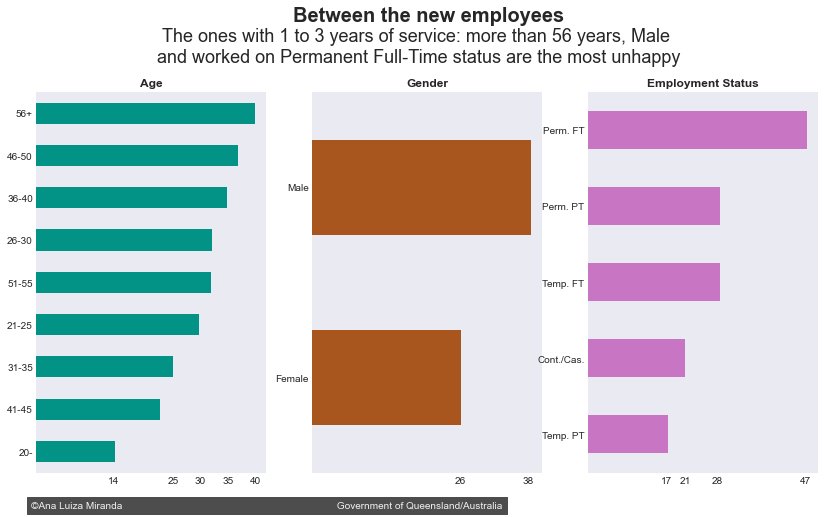

In [72]:
#Plotting a graph with New employees values
fig, (ax1, ax2, ax3) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(14, 7))

ax1 = new_age.plot(kind='barh', ax=ax1, legend=None, color='#029386')
ax1.set_title('Age', weight="bold")
ax1.set_ylabel('')
ax1.set_xticks([14,25,30,35,40])
ax1.set_xticklabels([14,25,30,35,40])

ax2 = new_gen.plot(kind= 'barh', ax=ax2, legend=None, color='#A9561E')
ax2.set_title('Gender', weight="bold")
ax2.set_ylabel('')
ax2.set_xticks([26,38])
ax2.set_xticklabels([26,38])

ax3 = new_es.plot(kind= 'barh', ax=ax3, legend=None, color='#C875C4')
ax3.set_title('Employment Status',weight="bold")
ax3.set_ylabel('')
ax3.set_xticks([17,21,28,47])
ax3.set_xticklabels([17,21,28,47])

#Graph title
fig.text(x=0.38,y=1.02,s="Between the new employees",size=20, weight="bold")
fig.text(x=0.25,y=0.98,s="The ones with 1 to 3 years of service: more than 56 years, Male",size=18)
fig.text(x=0.24,y=0.94, s=" and worked on Permanent Full-Time status are the most unhappy",size=18)

#Foot signature/source of graph:
fig.text(x=0.12, y=0.055,s='©Ana Luiza Miranda' +' '*78 +"Government of Queensland/Australia", backgroundcolor="#4d4d4d", size=10, color="#f0f0f0")

plt.show()

### 2. Experienced

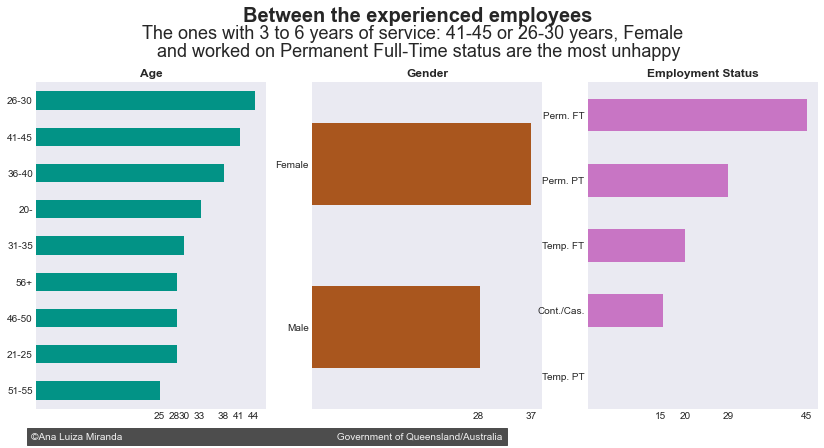

In [73]:
#Plotting a graph with Experienced employees values
fig, (ax1, ax2, ax3) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(14, 6))

ax1 = exp_age.plot(kind='barh', ax=ax1, legend=None, color='#029386')
ax1.set_title('Age', weight="bold")
ax1.set_ylabel('')
ax1.set_xticks([25,28,30,33,38,41,44])
ax1.set_xticklabels([25,28,30,33,38,41,44])

ax2 = exp_gen.plot(kind= 'barh', ax=ax2, legend=None, color='#A9561E')
ax2.set_title('Gender', weight="bold")
ax2.set_ylabel('')
ax2.set_xticks([28,37])
ax2.set_xticklabels([28,37])

ax3 = exp_es.plot(kind= 'barh', ax=ax3, legend=None, color='#C875C4')
ax3.set_title('Employment Status',weight="bold")
ax3.set_ylabel('')
ax3.set_xticks([15,20,29,45])
ax3.set_xticklabels([15,20,29,45])

#Graph title
fig.text(x=0.33,y=1.02,s="Between the experienced employees",size=20, weight="bold")
fig.text(x=0.23,y=0.98,s="The ones with 3 to 6 years of service: 41-45 or 26-30 years, Female",size=18)
fig.text(x=0.24,y=0.94, s=" and worked on Permanent Full-Time status are the most unhappy",size=18)

#Foot signature/source of graph:
fig.text(x=0.12, y=0.055,s='©Ana Luiza Miranda' +' '*78 +"Government of Queensland/Australia", backgroundcolor="#4d4d4d", size=10, color="#f0f0f0")

plt.show()

### 3. Established

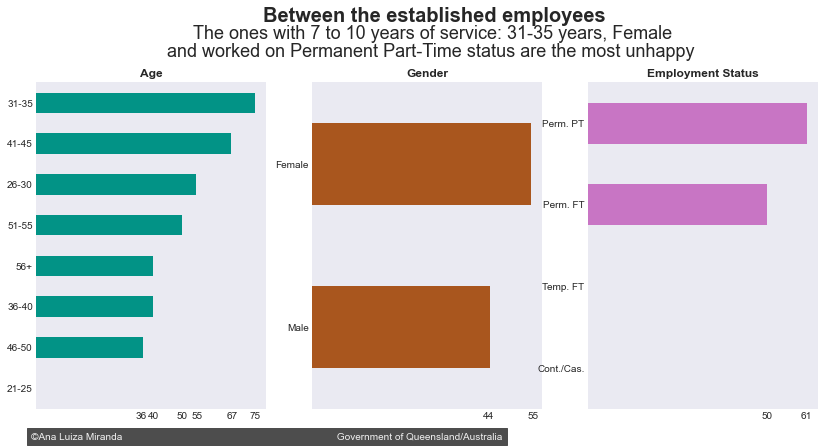

In [74]:
#Plotting a graph with Established employees values
fig, (ax1, ax2, ax3) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(14, 6))

ax1 = est_age.plot(kind='barh', ax=ax1, legend=None, color='#029386')
ax1.set_title('Age', weight="bold")
ax1.set_ylabel('')
ax1.set_xticks([36,40,50,55,67,75])
ax1.set_xticklabels([36,40,50,55,67,75])

ax2 = est_gen.plot(kind= 'barh', ax=ax2, legend=None, color='#A9561E')
ax2.set_title('Gender', weight="bold")
ax2.set_ylabel('')
ax2.set_xticks([44,55])
ax2.set_xticklabels([44,55])

ax3 = est_es.plot(kind= 'barh', ax=ax3, legend=None, color='#C875C4')
ax3.set_title('Employment Status',weight="bold")
ax3.set_ylabel('')
ax3.set_xticks([50,61])
ax3.set_xticklabels([50,61])

#Graph title
fig.text(x=0.35,y=1.02,s="Between the established employees",size=20, weight="bold")
fig.text(x=0.28,y=0.98,s="The ones with 7 to 10 years of service: 31-35 years, Female",size=18)
fig.text(x=0.25,y=0.94, s=" and worked on Permanent Part-Time status are the most unhappy",size=18)

#Foot signature/source of graph:
fig.text(x=0.12, y=0.055,s='©Ana Luiza Miranda' +' '*78 +"Government of Queensland/Australia", backgroundcolor="#4d4d4d", size=10, color="#f0f0f0")

plt.show()

### 4. Veteran

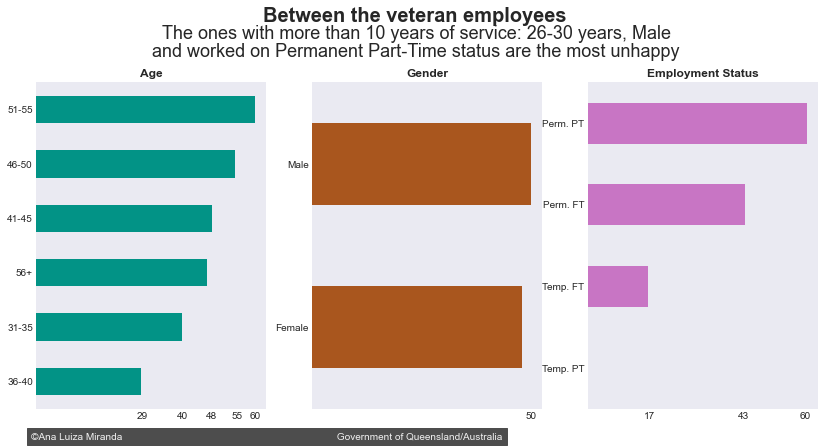

In [75]:
#Plotting a graph with Veteran employees values
fig, (ax1, ax2, ax3) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(14, 6))

ax1 = vet_age.plot(kind='barh', ax=ax1, legend=None, color='#029386')
ax1.set_title('Age', weight="bold")
ax1.set_ylabel('')
ax1.set_xticks([29,40,48,55,60])
ax1.set_xticklabels([29,40,48,55,60])

ax2 = vet_gen.plot(kind= 'barh', ax=ax2, legend=None, color='#A9561E')
ax2.set_title('Gender', weight="bold")
ax2.set_ylabel('')
ax2.set_xticks([50])
ax2.set_xticklabels([50])

ax3 = vet_es.plot(kind= 'barh', ax=ax3, legend=None, color='#C875C4')
ax3.set_title('Employment Status',weight="bold")
ax3.set_ylabel('')
ax3.set_xticks([17,43,60])
ax3.set_xticklabels([17,43,60])

#Graph title
fig.text(x=0.35,y=1.02,s="Between the veteran employees",size=20, weight="bold")
fig.text(x=0.25,y=0.98,s="The ones with more than 10 years of service: 26-30 years, Male",size=18)
fig.text(x=0.235,y=0.94, s=" and worked on Permanent Part-Time status are the most unhappy",size=18)

#Foot signature/source of graph:
fig.text(x=0.12, y=0.055,s='©Ana Luiza Miranda' +' '*78 +"Government of Queensland/Australia", backgroundcolor="#4d4d4d", size=10, color="#f0f0f0")

plt.show()

## Conclusion
- In this project, we analyzed exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) of Queensland in Australia.
- Our goal was identify the dissatisfaction of the employees that exit, the ones who worked for a short period and the ones that stayed longer. 
- In the Exploratory Data Analysis section, we analyse the percentages of dissatisfaction of ex employees according to the time of service, age, gender and employment status. Besides that, we also analyse the age, gender and employment status between the career stage category. We notice that the profiles of dissatisfied employees are different accordingly to the years of service, and the actions to minimize job dissatisfaction must be [suitable to each category](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).
- In the Data Visualization section, we showed graphs with the results of our analysis. 
- For more informations about job dissatisfaction, we recommend [this article](https://www.bamboohr.com/hr-glossary/job-dissatisfaction/), with definition, possible causes and ways to identify the low motivation of employees.